In [1]:
df = pd.DataFrame(np.random.randint(0,100,size=(100, 4)), columns=list('ABCD'))

NameError: name 'pd' is not defined

In [ ]:
df

In [ ]:
n_chunks = 10

In [ ]:
remaining_index = pd.Series(df.index.values)
chunk_length = np.floor(len(remaining_index)/n_chunks)

In [ ]:
for i in range(0,n_chunks):
    chunk = remaining_index.sample(n=int(chunk_length))
    print(chunk)
    remaining_index = remaining_index.drop(chunk)
    print(remaining_index)
    dfnew = df.iloc[chunk]
    print(dfnew)

In [2]:
import numpy as np
import os
import pandas as pd
from pygformula import ParametricGformula
from pygformula.parametric_gformula.interventions import static
from pygformula.data import load_basicdata_nocomp
from IPython import get_ipython
import pickle

### Survival example

In [3]:
obs_data = pd.read_csv(os.path.join('../pygformula-main/datasets/example_data_basicdata.csv'))

start fitting parametric model.
start simulating.
+---------------------+---------+----------------------------------+----------------+---------------------+
|     Intervention    | NP risk | g-formula risk (NICE-parametric) | Risk Ratio(RR) | Risk Difference(RD) |
+---------------------+---------+----------------------------------+----------------+---------------------+
| Natural course(ref) | 0.52759 |             0.53977              |    1.00000     |       0.00000       |
|     Never treat     |    NA   |             0.79619              |    1.47506     |       0.25642       |
|     Always treat    |    NA   |             0.24866              |    0.46068     |       -0.29111      |
+---------------------+---------+----------------------------------+----------------+---------------------+


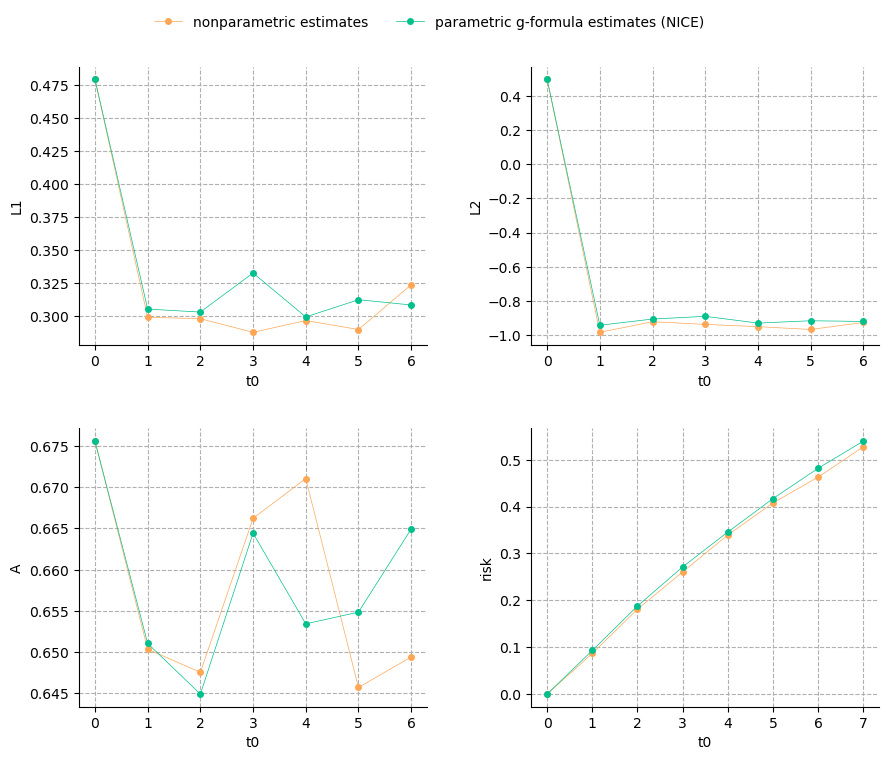

********************************************************************
CPU times: user 7.62 s, sys: 1.02 s, total: 8.63 s
Wall time: 3.1 s


In [5]:
%%time

time_name = 't0'
id = 'id'

covnames = ['L1', 'L2', 'A']
covtypes = ['binary', 'bounded normal', 'binary']
covmodels = ['L1 ~ lag1_A + t0',
           'L2 ~ lag1_A + L1 + L3 + t0',
           'A ~ lag1_A + L1 + L2 + L3 + t0']

basecovs = ['L3']

outcome_name = 'Y'

outcome_type = 'survival'
ymodel = 'Y ~ L1 + L2 + L3 + A + lag1_A + lag1_L1 + lag1_L2 + t0'
#ymodel_type = 'Random_forest'
ymodel_type = None


time_points = np.max(np.unique(obs_data[time_name])) + 1
int_descript = ['Never treat', 'Always treat']

g = ParametricGformula(obs_data = obs_data, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, ymodel_type=ymodel_type, outcome_type=outcome_type,
             Intervention1_A = [static, np.zeros(time_points)],
             Intervention2_A = [static, np.ones(time_points)],
             nsamples=0, parallel=True, ncores=18)
g.fit()
g.plot_natural_course()
#g.plot_interventions()
print('********************************************************************')

start fitting parametric model.
start simulating.
+---------------------+---------+----------------------------------+----------------+---------------------+
|     Intervention    | NP mean | g-formula mean (NICE-parametric) | Mean Ratio(MR) | Mean Difference(MD) |
+---------------------+---------+----------------------------------+----------------+---------------------+
| Natural course(ref) | 0.12037 |             0.11325              |    1.00000     |       0.00000       |
|     Never treat     |    NA   |             0.21579              |    1.90554     |       0.10255       |
|     Always treat    |    NA   |             0.04445              |    0.39254     |       -0.06879      |
+---------------------+---------+----------------------------------+----------------+---------------------+


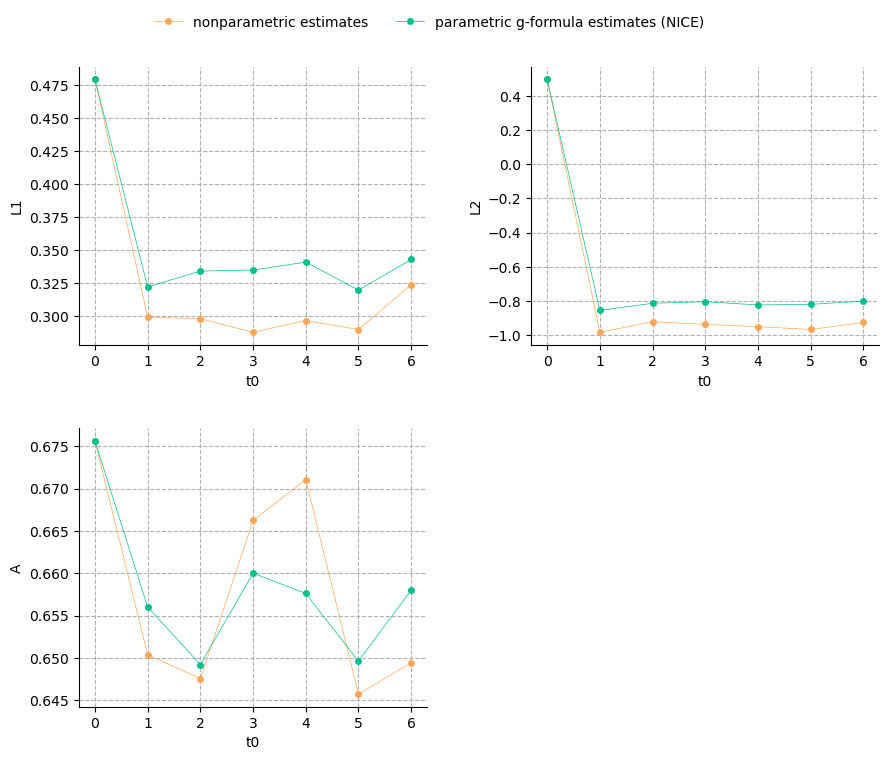

********************************************************************
CPU times: user 8.23 s, sys: 818 ms, total: 9.05 s
Wall time: 2.67 s


In [6]:
%%time

time_name = 't0'
id = 'id'

covnames = ['L1', 'L2', 'A']
covtypes = ['binary', 'bounded normal', 'binary']
covmodels = ['L1 ~ lag1_A + t0',
           'L2 ~ lag1_A + L1 + L3 + t0',
           'A ~ lag1_A + L1 + L2 + L3 + t0']

basecovs = ['L3']

outcome_name = 'Y'

outcome_type = 'binary_eof'
ymodel = 'Y ~ L1 + L2 + L3 + A + lag1_A + lag1_L1 + lag1_L2 + t0'
#ymodel_type = 'Random_forest'
ymodel_type = None


time_points = np.max(np.unique(obs_data[time_name])) + 1
int_descript = ['Never treat', 'Always treat']

g = ParametricGformula(obs_data = obs_data, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, ymodel_type=ymodel_type, outcome_type=outcome_type,
             Intervention1_A = [static, np.zeros(time_points)],
             Intervention2_A = [static, np.ones(time_points)],
             nsamples=0, parallel=True, ncores=18)
g.fit()
g.plot_natural_course()
#g.plot_interventions()
print('********************************************************************')

In [ ]:
# Serialize the object to a binary format
with open('gform.pkl', 'wb') as file:
    pickle.dump(g, file)

In [ ]:
# Deserialize the object from the binary file
with open('gformRF.pkl', 'rb') as file:
    g = pickle.load(file)

In [ ]:
%%time

time_name = 't0'
id = 'id'

covnames = ['L1', 'L2', 'A']
covtypes = ['binary', 'bounded normal', 'binary']
covmodels = ['L1 ~ lag1_A + t0',
           'L2 ~ lag1_A + L1 + L3 + t0',
           'A ~ lag1_A + L1 + L2 + L3 + t0']

basecovs = ['L3']

outcome_name = 'Y'

outcome_type = 'survival'
ymodel = 'Y ~ L1 + L2 + L3 + A + lag1_A + lag1_L1 + lag1_L2 + t0'


time_points = np.max(np.unique(obs_data[time_name])) + 1
int_descript = ['Never treat', 'Always treat']

g = ParametricGformula(obs_data = obs_data, id = id, time_name=time_name,
             time_points = time_points, int_descript = int_descript,
             covnames=covnames, covtypes=covtypes,
             covmodels=covmodels, basecovs=basecovs,
             outcome_name=outcome_name, ymodel=ymodel, outcome_type=outcome_type,
             Intervention1_A = [static, np.zeros(time_points)],
             Intervention2_A = [static, np.ones(time_points)],
             nsamples=20, parallel=True, ncores=18)
g.fit()
g.plot_natural_course()
#g.plot_interventions()
print('********************************************************************')

In [ ]:
obs_data

### Binary eof example

In [ ]:
from pygformula.data import load_binary_eof
from pygformula.parametric_gformula.interventions import threshold

obs_data = pd.read_csv(os.path.join('pygformula-main/datasets/example_data_binary_eof.csv'))

In [ ]:
time_name = 't0'
id = 'id'

covnames = ['L1', 'L2', 'A']
covtypes = ['binary', 'zero-inflated normal', 'normal']
covmodels = ['L1 ~ lag1_A + lag2_A + lag_cumavg1_L1 + L3 + t0',
             'L2 ~ lag1_A + L1 + lag_cumavg1_L1 + lag_cumavg1_L2 + L3 + t0',
             'A ~ lag1_A + L1 + L2 + lag_cumavg1_L1 + lag_cumavg1_L2 + L3 + t0']

basecovs = ['L3']

outcome_name = 'Y'
ymodel = 'Y ~ L1 + A + lag1_A + lag1_L1 + L3 + t0'
outcome_type = 'binary_eof'

int_descript = ['Threshold intervention']

g = ParametricGformula(obs_data = obs_data, id = id, time_name=time_name,
    int_descript = int_descript,
    Intervention1_A = [threshold, [0.5, float('inf')]],
    covnames=covnames, covtypes=covtypes,
    covmodels=covmodels, basecovs=basecovs,
    outcome_name=outcome_name, ymodel=ymodel, outcome_type=outcome_type)
g.fit()

In [ ]:
time_name = 't0'
id = 'id'

covnames = ['L1', 'L2', 'A']
covtypes = ['binary', 'zero-inflated normal', 'normal']
covmodels = ['L1 ~ lag1_A + lag2_A + lag_cumavg1_L1 + L3 + t0',
             'L2 ~ lag1_A + L1 + lag_cumavg1_L1 + lag_cumavg1_L2 + L3 + t0',
             'A ~ lag1_A + L1 + L2 + lag_cumavg1_L1 + lag_cumavg1_L2 + L3 + t0']

basecovs = ['L3']

outcome_name = 'Y'
ymodel = 'Y ~ L1 + A + lag1_A + lag1_L1 + L3 + t0'
ymodel_type = 'Random_forest'

int_descript = ['Threshold intervention']

g = ParametricGformula(obs_data = obs_data, id = id, time_name=time_name,
    int_descript = int_descript,
    Intervention1_A = [threshold, [0.5, float('inf')]],
    covnames=covnames, covtypes=covtypes,
    covmodels=covmodels, basecovs=basecovs,
    outcome_name=outcome_name, ymodel=ymodel, ymodel_type=ymodel_type, outcome_type=outcome_type)
g.fit()

In [ ]:
obs_data.head(10)